In [82]:
# !pip install pandas
# !pip install sklearn
# !pip install scipy
# !pip install pandas_profiling
# !pip install tabulate
# !pip install matplotlib
# ! pip install plotly
# ! pip install geopandas

3122.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.6 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 10.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 12.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [83]:
import pandas as pd 
import numpy as np
import statistics as st
from tabulate import tabulate
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import geopandas as gpd # geospatial data processing

# Read Data

In [13]:
# Read csv file 
# PARAMATER: csv file name
# returns pandas dataframe 

def read_csv(fname):
    data =  pd.read_csv(fname, low_memory = False)
    # Fill missing values with NaN
    data = data.replace(" ", np.nan)
    data = data.replace("", np.nan)
    return data


data = read_csv("tmpfap3hfze.csv")
data.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,212021001,619,NaN,LARCENY ALL OTHERS,B2,181,0,2021-01-01 00:00:00,2021,1,Friday,0,NaN,ALLERTON ST & MAGAZINE ST\nROXBURY MA 02119\n...,42.327551,-71.069162,"(42.327550999587764, -71.0691619893362)"
1,212025963,3201,NaN,PROPERTY - LOST/ MISSING,B3,465,0,2021-01-01 00:00:00,2021,1,Friday,0,NaN,WHITFIELD ST,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
2,212022379,1102,NaN,FRAUD - FALSE PRETENSE / SCHEME,C6,574,0,2021-01-01 00:00:00,2021,1,Friday,0,NaN,MARINE RD,42.309719,-71.104294,"(42.30971856767274, -71.10429431787648)"
3,212019050,615,NaN,LARCENY THEFT OF MV PARTS & ACCESSORIES,A1,77,0,2021-01-01 00:00:00,2021,1,Friday,0,NaN,STANIFORD ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)"
4,212019422,3115,NaN,INVESTIGATE PERSON,B3,355,0,2021-01-01 00:00:00,2021,1,Friday,0,NaN,FULLER ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)"


# Determine Column Counts for Numeric and Object Columns

In [14]:
# Determine the number of missing values and the missing percentage
# PARAMETER: pandas dataframe
# returns pandas dataframe 

def determine_column_counts(df):
    columns = df.columns
    data_counts = pd.DataFrame(columns = ['column_name','column_type','distinct_data', 'distinct_percent', 'missing_data', 'missing_percentage'])
    
    #For each column, calculate number and percentage of missing rows and distinct counts
    for col in columns:
        col_vals = df[col]
        col_missing = sum(col_vals.isnull())
        missing_percent = round((col_missing / len(df[col])) * 100 , 3)
        col_distinct = (col_vals.nunique())
        distinct_percent = round((col_distinct / len(df[col])) * 100 , 3)
        
        # Append current col and caluclations to missing_data df 
        data_counts.loc[len(data_counts)] = [col, col_vals.dtype, col_distinct, distinct_percent, col_missing, missing_percent]
        
#     print(tabulate(data_counts, headers="keys", tablefmt="pipe"), "\n")
    return(data_counts)

In [15]:
# Extract all numeric columns of dataframe 
# PARAMETER: pandas dataframe
# returns pandas dataframe

def extract_numeric_cols(df):
    return(df._get_numeric_data())

# NUMERIC COLUMNS
numeric_cols = extract_numeric_cols(data)
print("Numeric Columns:", "\n")
print(numeric_cols.head(6), "\n")
numeric_column_counts = determine_column_counts(numeric_cols)


numeric_column_counts.head(6)


Numeric Columns: 

   OFFENSE_CODE  OFFENSE_CODE_GROUP  SHOOTING  YEAR  MONTH  HOUR  UCR_PART  \
0           619                 NaN         0  2021      1     0       NaN   
1          3201                 NaN         0  2021      1     0       NaN   
2          1102                 NaN         0  2021      1     0       NaN   
3           615                 NaN         0  2021      1     0       NaN   
4          3115                 NaN         0  2021      1     0       NaN   
5          1102                 NaN         0  2021      1     0       NaN   

         Lat       Long  
0  42.327551 -71.069162  
1  42.284826 -71.091374  
2  42.309719 -71.104294  
3  42.361839 -71.059765  
4  42.297555 -71.059709  
5  42.328663 -71.085634   



,column_name,column_type,distinct_data,distinct_percent,missing_data,missing_percentage
0,OFFENSE_CODE,int64,121,0.169,0,0.0
1,OFFENSE_CODE_GROUP,float64,0,0.000,71721,100.0
2,SHOOTING,int64,2,0.003,0,0.0
3,YEAR,int64,1,0.001,0,0.0
4,MONTH,int64,12,0.017,0,0.0
5,HOUR,int64,24,0.033,0,0.0


In [16]:
# Extract all object columns of dataframe 
# PARAMETER: pandas dataframe
# returns pandas dataframe

def extract_object_cols(df):
    return (df.select_dtypes(include = object))


#OBJECT COLUMNS
object_cols = extract_object_cols(data)
print("Object Columns:", "\n")
print(object_cols.columns, "\n")
object_column_counts = determine_column_counts(object_cols)

object_column_counts.head(6)


Object Columns: 

Index(['INCIDENT_NUMBER', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA',
       'OCCURRED_ON_DATE', 'DAY_OF_WEEK', 'STREET', 'Location'],
      dtype='object') 



,column_name,column_type,distinct_data,distinct_percent,missing_data,missing_percentage
0,INCIDENT_NUMBER,object,71721,100.000,0,0.000
1,OFFENSE_DESCRIPTION,object,121,0.169,0,0.000
2,DISTRICT,object,13,0.018,993,1.385
3,REPORTING_AREA,object,871,1.214,16643,23.205
4,OCCURRED_ON_DATE,object,59950,83.588,0,0.000
5,DAY_OF_WEEK,object,7,0.010,0,0.000


### Integer and Float columns: 
    OFFENSE_CODE, OFFENSE_CODE_GROUP, YEAR, MONTH,HOUR, UCR_PART, LAT, LONG
    
### Object Columns: 
    INCIDENT_NUMBER,OFFENSE_DESCRIPTION, DISTRICT, REPORTING_AREA, OCCURRED_ON_DATE, DAY_OF_WEEK, STREET, Location
   
   
## Missing Data

For numeric columns with missing values, imputation can be used to fill in these rows. For example, mean, median, or mode imputation can be utilized. This technique will fill any missing values with the specified statistic. If mode imputation is selected, the mode value of the column will used to fill in any missing values. Other possible techniques can include Linear Regression or K-Nearest Neighbors (KNN) Imputation. These techniques allow for slighlty more complex relationships to be utilzied when imputing missing values. Linear Regression Imputation can be used when there is a linear relationship between the missing variable and another well-defined variable in the dataset. KNN Imputation can allow for the consideration of similar samples to impute any missing data. This technique will impute missing values with the average of the KNN values. 

For object coumns there are similar techniques that can be utilized to impute missing values. Mode imputation is a simple approach that fills missing values with the mode category of the column. If mode imputation does not suit the needs of the dataset, constant value imputation can be used, where a predefined value is used to represent missing data. More complex methods like predicitive modeling and KNN can also be used to impute missing values. 

The method chosen for imputing values depends on the use case for a specific dataset and the type of information desired. 


In [17]:
def generate_cleaning_strategies(df, zscore_threshold=3, outlier_handling_method='drop'):
    cleaning_strategies = {}
    
    categorical_columns = df.select_dtypes(include='object')
    numeric_columns = df.select_dtypes(include=['int64', 'float64'])

    for column in categorical_columns:
        missing_percentage = (df[column].isnull().sum() / len(df)) * 100
        distinct_percentage = (df[column].nunique() / len(df)) * 100

        if missing_percentage >= 50:
            cleaning_strategies[column] = ['Remove column', 'High missing percentage']
        elif distinct_percentage >= 90:
            cleaning_strategies[column] = ['Remove rows with missing values', 'High distinct percentage']
        else:
            cleaning_strategies[column] = ['Impute missing values with mode', '']

    for column in numeric_columns:
        missing_percentage = (df[column].isnull().sum() / len(df)) * 100

        if missing_percentage >= 50:
            cleaning_strategies[column] = ['Remove column', 'High missing percentage']
        else:
            cleaning_strategies[column] = ['Impute missing values with median', '']

        # Add outlier detection and handling strategies to the cleaning strategies
        if outlier_handling_method == 'drop':
            cleaning_strategies[column].append('Drop rows with outliers')
        elif outlier_handling_method == 'replace_with_median':
            cleaning_strategies[column].append('Replace outliers with median')
        elif outlier_handling_method == 'replace_with_nan':
            cleaning_strategies[column].append('Replace outliers with NaN')
            
    

    return cleaning_strategies


In [18]:
#Data Cleaning Strategies
cleaning_strategies = generate_cleaning_strategies(data)

#Create Data Cleaning Strategies DF 
cleaning_strategies_table = [[column, strategy[0], strategy[1]] for column, strategy in cleaning_strategies.items()]
headers = ["Column", "Cleaning Strategy", "Reason"]
cleaning_strategies_df = pd.DataFrame(cleaning_strategies_table, columns = headers)

cleaning_strategies_df


,Column,Cleaning Strategy,Reason
0,INCIDENT_NUMBER,Remove rows with missing values,High distinct percentage
1,OFFENSE_DESCRIPTION,Impute missing values with mode,
2,DISTRICT,Impute missing values with mode,
3,REPORTING_AREA,Impute missing values with mode,
4,OCCURRED_ON_DATE,Impute missing values with mode,
5,DAY_OF_WEEK,Impute missing values with mode,
6,STREET,Impute missing values with mode,
7,Location,Impute missing values with mode,
8,OFFENSE_CODE,Impute missing values with median,
9,OFFENSE_CODE_GROUP,Remove column,High missing percentage


In [19]:
def apply_cleaning_strategy(df, column, cleaning_strategy):
    if cleaning_strategy == 'Remove column':
        df.drop(column, axis=1, inplace=True)
    elif cleaning_strategy == 'Remove rows with missing values':
        df.dropna(subset=[column], inplace=True)
    elif cleaning_strategy == 'Impute missing values with mode':
        df[column].fillna(df[column].mode()[0], inplace=True)
    elif cleaning_strategy == 'Impute missing values with median':
        df[column].fillna(df[column].median(), inplace=True)
    elif cleaning_strategy == 'Drop rows with outliers':
        df = df[~detect_outliers_zscore(df[column])]
    elif cleaning_strategy == 'Replace outliers with median':
        df.loc[detect_outliers_zscore(df[column]), column] = df[column].median()
    elif cleaning_strategy == 'Replace outliers with NaN':
        df.loc[detect_outliers_zscore(df[column]), column] = np.nan

    return df


def clean_data(df, cleaning_strategies):
    for column, strategy in cleaning_strategies.items():
        df = apply_cleaning_strategy(df, column, strategy[0])

    return df


#Clean Data According to cleaning strategies 
cleaned_data = clean_data(data, cleaning_strategies)
cleaned_data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,212021001,619,LARCENY ALL OTHERS,B2,181,0,2021-01-01 00:00:00,2021,1,Friday,0,ALLERTON ST & MAGAZINE ST\nROXBURY MA 02119\n...,42.327551,-71.069162,"(42.327550999587764, -71.0691619893362)"
1,212025963,3201,PROPERTY - LOST/ MISSING,B3,465,0,2021-01-01 00:00:00,2021,1,Friday,0,WHITFIELD ST,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
2,212022379,1102,FRAUD - FALSE PRETENSE / SCHEME,C6,574,0,2021-01-01 00:00:00,2021,1,Friday,0,MARINE RD,42.309719,-71.104294,"(42.30971856767274, -71.10429431787648)"
3,212019050,615,LARCENY THEFT OF MV PARTS & ACCESSORIES,A1,77,0,2021-01-01 00:00:00,2021,1,Friday,0,STANIFORD ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)"
4,212019422,3115,INVESTIGATE PERSON,B3,355,0,2021-01-01 00:00:00,2021,1,Friday,0,FULLER ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71716,222000167,3201,PROPERTY - LOST/ MISSING,A1,77,0,2021-12-31 23:00:00,2021,12,Friday,23,NEW SUDBURY ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)"
71717,212095526,3111,LICENSE PREMISE VIOLATION,C6,355,0,2021-12-31 23:15:00,2021,12,Friday,23,SEAPORT BLVD,42.352756,-71.047481,"(42.352756167727144, -71.04748127479294)"
71718,212095530,3114,INVESTIGATE PROPERTY,B2,355,0,2021-12-31 23:21:00,2021,12,Friday,23,HUMBOLDT AVE,42.314303,-71.088566,"(42.31430347467973, -71.08856593453203)"
71719,222000197,3202,PROPERTY - LOST THEN LOCATED,B3,409,0,2021-12-31 23:30:00,2021,12,Friday,23,MENTON ST,42.272983,-71.078050,"(42.27298349626727, -71.07804969908256)"


In [20]:
#Check to see if any missing data left 
missing_data = determine_column_counts(data)
missing_data

,column_name,column_type,distinct_data,distinct_percent,missing_data,missing_percentage
0,INCIDENT_NUMBER,object,71721,100.000,0,0.0
1,OFFENSE_CODE,int64,121,0.169,0,0.0
2,OFFENSE_DESCRIPTION,object,121,0.169,0,0.0
3,DISTRICT,object,13,0.018,0,0.0
4,REPORTING_AREA,object,871,1.214,0,0.0
5,SHOOTING,int64,2,0.003,0,0.0
6,OCCURRED_ON_DATE,object,59950,83.588,0,0.0
7,YEAR,int64,1,0.001,0,0.0
8,MONTH,int64,12,0.017,0,0.0
9,DAY_OF_WEEK,object,7,0.010,0,0.0


##### The data is now cleaned as there is no missing data and any columns that need to be removed have been removed. 

# Univariate Analysis

In [21]:
cleaned_data

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,212021001,619,LARCENY ALL OTHERS,B2,181,0,2021-01-01 00:00:00,2021,1,Friday,0,ALLERTON ST & MAGAZINE ST\nROXBURY MA 02119\n...,42.327551,-71.069162,"(42.327550999587764, -71.0691619893362)"
1,212025963,3201,PROPERTY - LOST/ MISSING,B3,465,0,2021-01-01 00:00:00,2021,1,Friday,0,WHITFIELD ST,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
2,212022379,1102,FRAUD - FALSE PRETENSE / SCHEME,C6,574,0,2021-01-01 00:00:00,2021,1,Friday,0,MARINE RD,42.309719,-71.104294,"(42.30971856767274, -71.10429431787648)"
3,212019050,615,LARCENY THEFT OF MV PARTS & ACCESSORIES,A1,77,0,2021-01-01 00:00:00,2021,1,Friday,0,STANIFORD ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)"
4,212019422,3115,INVESTIGATE PERSON,B3,355,0,2021-01-01 00:00:00,2021,1,Friday,0,FULLER ST,42.297555,-71.059709,"(42.29755532959655, -71.05970910242573)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71716,222000167,3201,PROPERTY - LOST/ MISSING,A1,77,0,2021-12-31 23:00:00,2021,12,Friday,23,NEW SUDBURY ST,42.361839,-71.059765,"(42.361838566564714, -71.05976489094158)"
71717,212095526,3111,LICENSE PREMISE VIOLATION,C6,355,0,2021-12-31 23:15:00,2021,12,Friday,23,SEAPORT BLVD,42.352756,-71.047481,"(42.352756167727144, -71.04748127479294)"
71718,212095530,3114,INVESTIGATE PROPERTY,B2,355,0,2021-12-31 23:21:00,2021,12,Friday,23,HUMBOLDT AVE,42.314303,-71.088566,"(42.31430347467973, -71.08856593453203)"
71719,222000197,3202,PROPERTY - LOST THEN LOCATED,B3,409,0,2021-12-31 23:30:00,2021,12,Friday,23,MENTON ST,42.272983,-71.078050,"(42.27298349626727, -71.07804969908256)"


Text(0.5, 1.0, 'Offense Code Counts')

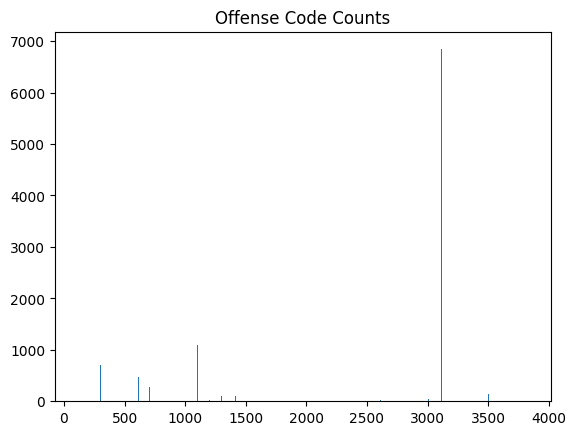

In [22]:
categories = cleaned_data['OFFENSE_CODE'].value_counts().index
counts = cleaned_data['OFFENSE_CODE'].value_counts().values
plt.bar(categories, counts)
plt.title("Offense Code Counts")

Text(0.5, 1.0, 'District Counts')

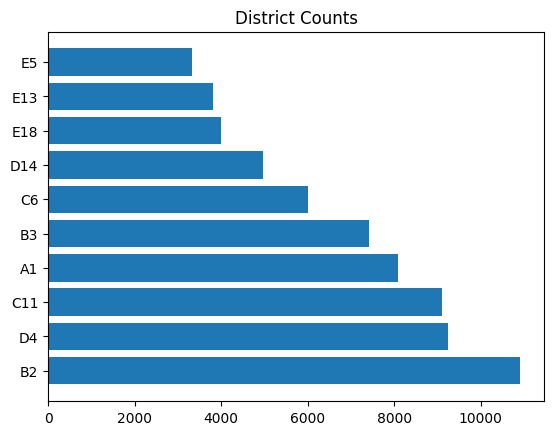

In [23]:
categories = cleaned_data['DISTRICT'].value_counts().index
counts = cleaned_data['DISTRICT'].value_counts().values
plt.barh(categories[0:10], counts[0:10])
plt.title("District Counts")

Text(0.5, 1.0, 'Shooting Counts')

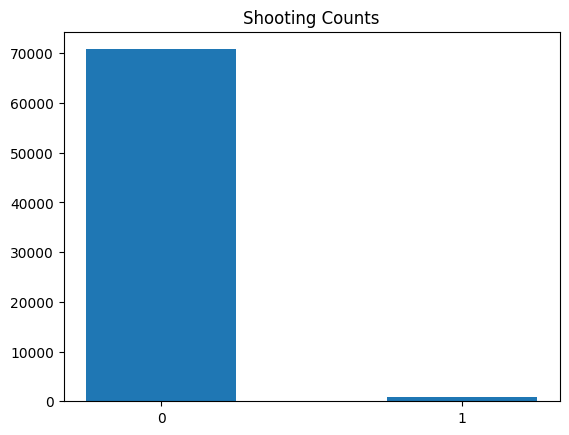

In [24]:
categories = cleaned_data['SHOOTING'].value_counts().index
counts = cleaned_data['SHOOTING'].value_counts().values
plt.bar(categories, counts, width = 0.5)
plt.xticks(categories)
plt.title("Shooting Counts")

The majority of the crimes do not involve shootings. 

Text(0.5, 1.0, 'Offense Description Counts')

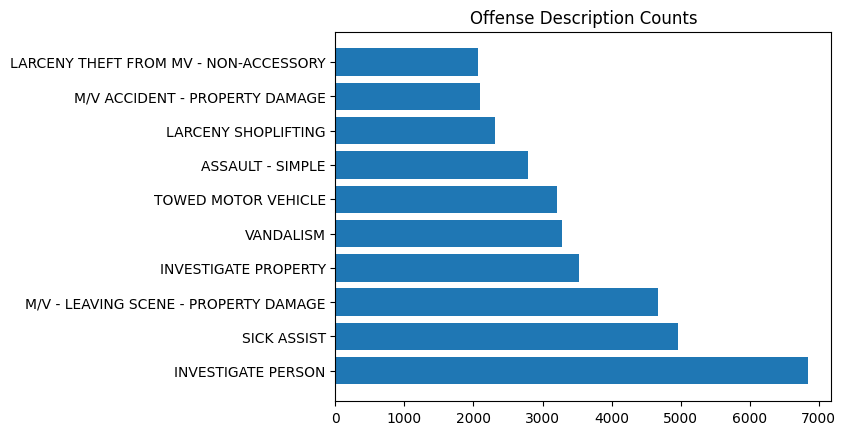

In [25]:
categories = cleaned_data['OFFENSE_DESCRIPTION'].value_counts().index
counts = cleaned_data['OFFENSE_DESCRIPTION'].value_counts().values
plt.barh(categories[0:10], counts[0:10])
plt.title("Offense Description Counts")

Text(0.5, 1.0, 'Occured On Date Counts')

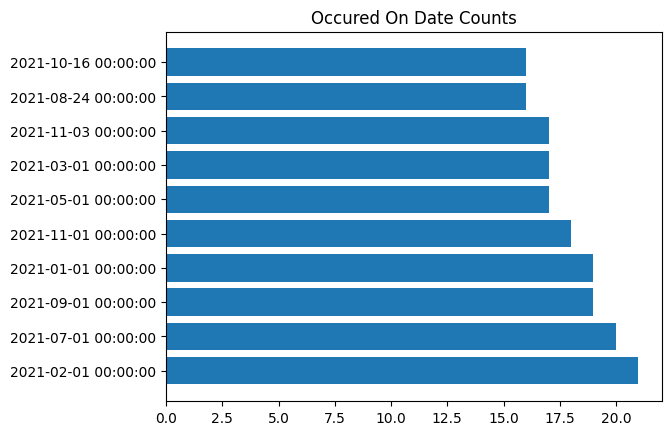

In [26]:
categories = cleaned_data['OCCURRED_ON_DATE'].value_counts().index
counts = cleaned_data['OCCURRED_ON_DATE'].value_counts().values
plt.barh(categories[0:10], counts[0:10])
plt.title("Occured On Date Counts")

Text(0.5, 1.0, 'Month Counts')

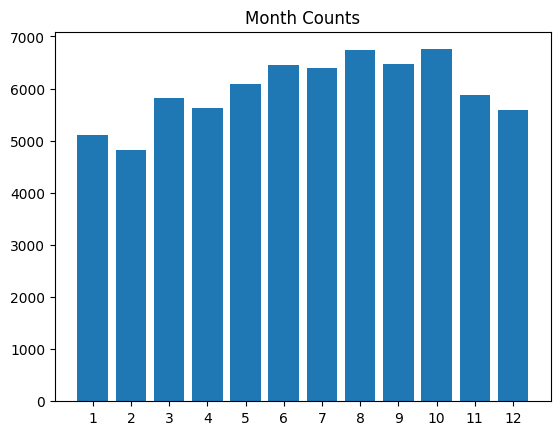

In [27]:
categories = cleaned_data['MONTH'].value_counts().index
counts = cleaned_data['MONTH'].value_counts().values
plt.bar(categories, counts)
plt.xticks(np.arange(1,13, step = 1))
plt.title("Month Counts")

Text(0.5, 1.0, 'Day of Week Counts')

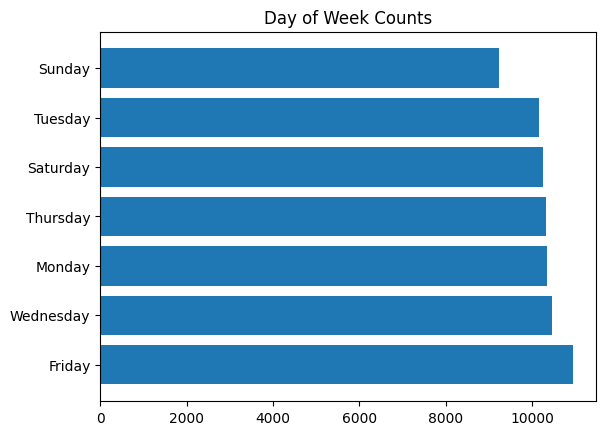

In [28]:
categories = cleaned_data['DAY_OF_WEEK'].value_counts().index
counts = cleaned_data['DAY_OF_WEEK'].value_counts().values
plt.barh(categories, counts)
plt.title("Day of Week Counts")

Crime seems to be fairly uniform across the days of the week and months of the year.

Text(0.5, 1.0, 'Hour Counts')

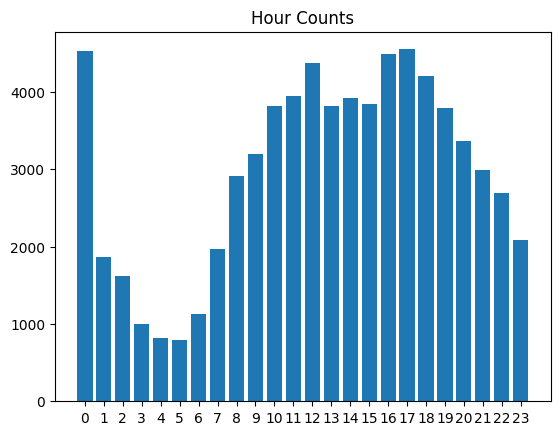

In [29]:
categories = cleaned_data['HOUR'].value_counts().index
counts = cleaned_data['HOUR'].value_counts().values
plt.bar(categories, counts)
plt.xticks(np.arange(0,24, step = 1))
plt.title("Hour Counts")

Crime tends to be lower from 1:00 - 6:00 with the peak hours being 16:00-18:00 and around 0:00

Text(0.5, 1.0, 'Street Counts')

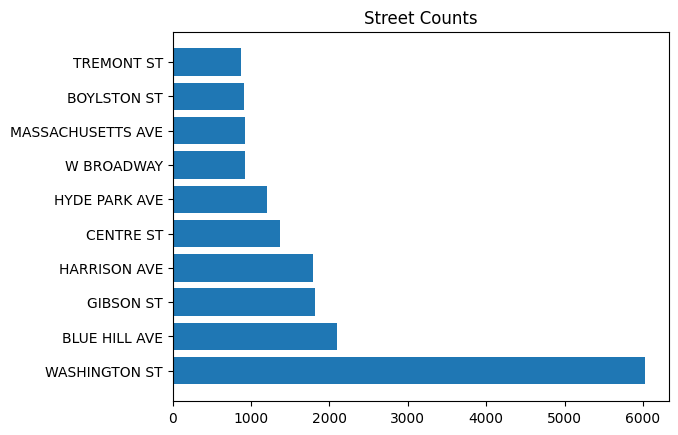

In [30]:
categories = cleaned_data['STREET'].value_counts().index
counts = cleaned_data['STREET'].value_counts().values
plt.barh(categories[0:10], counts[0:10])
plt.title("Street Counts")

Washington Street significantly has the highest reported crimes.

In [80]:
loc_counts = pd.DataFrame()
loc_counts['Location'] = cleaned_data['Location'].value_counts().index
loc_counts['Lat'] =  cleaned_data['Lat'].value_counts().index
loc_counts['Long'] =  cleaned_data['Long'].value_counts().index
loc_counts['Counts'] =cleaned_data['Location'].value_counts().values

loc_counts.head(5)

fig = px.density_mapbox(loc_counts, lat='Lat', lon='Long', z='Counts',
                        mapbox_style="stamen-terrain", zoom = 10)
 
fig